# Predictions for 2025 Season:
Who will win the Drivers' and Constructors' Championship based on historical and current data?


### Neural Net To Predict the final grid Position of driver

In [29]:
#imports
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import confusion_matrix, roc_curve, precision_recall_curve, auc, accuracy_score, r2_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
import joblib

In [3]:
data=pd.read_csv('../../../data/processed/fully_integrated_data.csv')

In [4]:
#selecting features depending on correlation matrix from EDA performed in Phase 1
features = ['season','driverId','constructorId', 'driverStartGridPos', 
            'driverFinalGridPos', 'driverChampionshipStandingPosition', 
            'constructorChampionshipStandingPosition']

#Dropping unnecessary features and setting target variable - driver ranking in each race
X = data[features]
y = data['driverFinalRank']

# split dataset into training(80%) and testing sets (20%) and stratifying over season
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=42, 
                                                    stratify=data['season'])

# Scale the features to ensure all features are at same scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Defining the MLP regressor
model = MLPRegressor()

# Define the parameter grid for GridSearchCV
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 100)],
    'activation': ['relu', 'tanh', 'logistic'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive']
}

# Perform GridSearchCV to find the best parameters for the model
grid_search = GridSearchCV(model, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)


# Use the best parameters to build the final model
best_model = MLPRegressor(**grid_search.best_params_)
best_model.fit(X_train_scaled, y_train)

# Predict the test set labels
y_pred = best_model.predict(X_test_scaled)

c:\Users\yeshw\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\yeshw\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [5]:
# Calculate r2 score
r2 = r2_score(y_test, y_pred)
print("r2 score: {:.2f}%".format(r2*100))

r2 score: 89.90%


c:\Users\yeshw\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\yeshw\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\yeshw\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\yeshw\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the opti

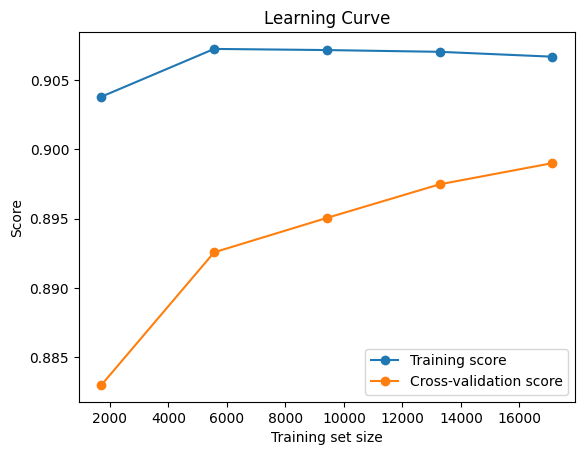

In [6]:
train_sizes, train_scores, test_scores = learning_curve(best_model, X_train_scaled, y_train, cv=5)
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
plt.plot(train_sizes, train_scores_mean, 'o-', label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', label='Cross-validation score')
plt.xlabel('Training set size')
plt.ylabel('Score')
plt.title('Learning Curve')
plt.legend()
plt.show()

In [7]:
from joblib import dump,load

model_file = 'gridfind.joblib'
scaler_file = 'scaler1.joblib'
dump(best_model, model_file)
dump(scaler, scaler_file)

['scaler1.joblib']

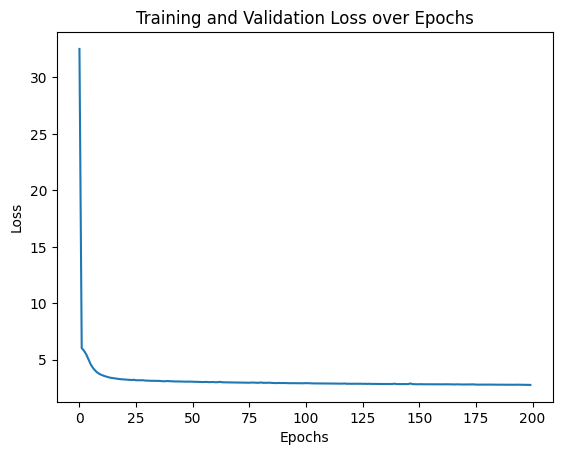

In [8]:
plt.plot(best_model.loss_curve_)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss over Epochs")
plt.show()

In [18]:
scaler1= joblib.load('scaler1.joblib')
print("Features seen during training:", scaler1.feature_names_in_)

Features seen during training: ['season' 'driverId' 'constructorId' 'driverStartGridPos'
 'driverFinalGridPos' 'driverChampionshipStandingPosition'
 'constructorChampionshipStandingPosition']


Input shape: (479, 7)
Features present: True

2025 Championship Prediction (Based on Grid Positions):
                     Constructor  Predicted_Position
Driver                                              
Kevin Magnussen     Haas F1 Team            0.062977
Liam Lawson           RB F1 Team            0.186426
Esteban Ocon      Alpine F1 Team            0.193359
Nico Hülkenberg     Haas F1 Team            0.236692
Oliver Bearman           Ferrari            0.284958
Daniel Ricciardo      RB F1 Team            0.323200
George Russell          Mercedes            0.407032
Lance Stroll        Aston Martin            0.410347
Jack Doohan       Alpine F1 Team            0.446683
Oscar Piastri            McLaren            0.447919
Lando Norris             McLaren            0.447967
Charles Leclerc          Ferrari            0.447991
Franco Colapinto        Williams            0.447994
Guanyu Zhou               Sauber            0.447994
Valtteri Bottas           Sauber            0.4479

c:\Users\yeshw\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but MLPRegressor was fitted without feature names
  warnings.warn(


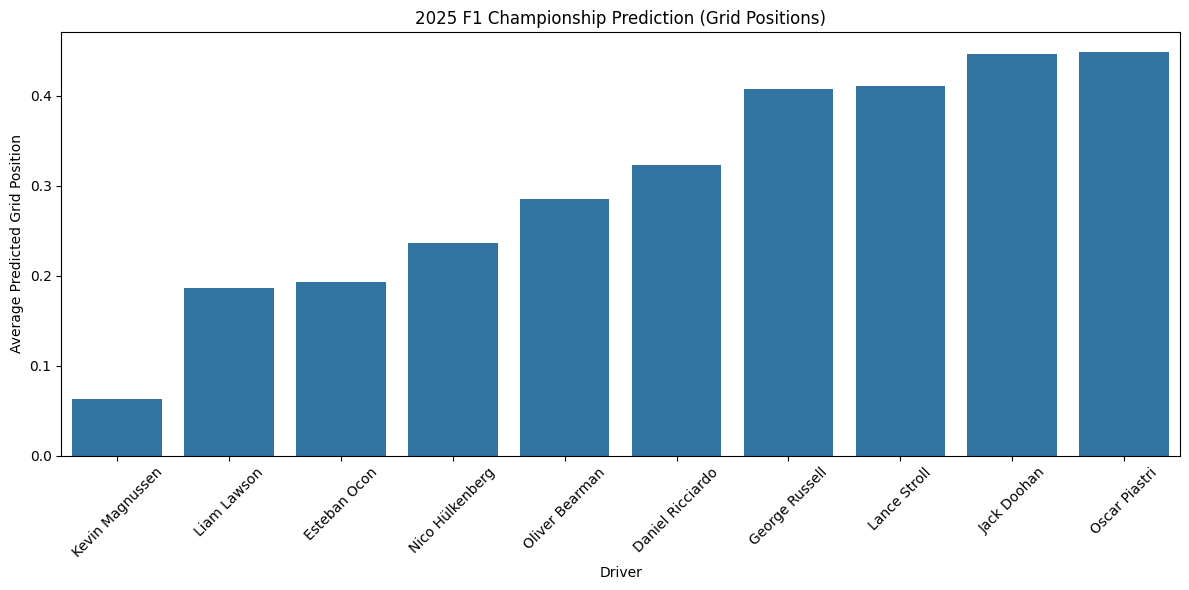

In [ ]:
class F1_GridPredictor:
    def __init__(self):
        # Load only grid position model
        self.grid_model = joblib.load('gridfind.joblib')
        
        # Grid model features
        self.features = [
            'season', 'driverId', 'constructorId', 
            'driverStartGridPos', 'driverFinalGridPos',
            'driverChampionshipStandingPosition',
            'constructorChampionshipStandingPosition'
        ]
        
    def predict_championship(self, data):
        """Predict 2025 championship using only grid positions"""
        try:
            # Select features
            X = data[self.features]           
            
            # Verify data
            print(f"Input shape: {X.shape}")
            print("Features present:", all(f in data.columns for f in self.features))
            
            # Predict grid positions
            predicted_positions = self.grid_model.predict(X)
            
            # Create results DataFrame
            results = pd.DataFrame({
                'Driver': data['driverName'],
                'Constructor': data['constructorName'],
                'Predicted_Position': predicted_positions
            })
            
            # Calculate championship standings
            championship = results.groupby('Driver').agg({
                'Constructor': 'first',
                'Predicted_Position': 'mean'
            }).sort_values('Predicted_Position')
            
            return championship
            
        except Exception as e:
            print(f"Prediction error: {str(e)}")
            raise

# Usage
predictor = F1_GridPredictor()

# Get 2024 data
current_data = data[data['season'] == 2024].copy()

# Predict championship
grid_championship = predictor.predict_championship(current_data)

# Show results
print("\n2025 Championship Prediction (Based on Grid Positions):")
print(grid_championship)

# Visualize top 10
plt.figure(figsize=(12, 6))
sns.barplot(
    data=grid_championship.head(10),
    x=grid_championship.index[:10],
    y='Predicted_Position'
)
plt.title('2025 F1 Championship Prediction (Grid Positions)')
plt.xticks(rotation=45)
plt.ylabel('Average Predicted Grid Position')
plt.tight_layout()
plt.show()

In [1]:
import pandas as pd
import numpy as np
import joblib
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

class F1DriverPredictor:
    def __init__(self):
        # Load your pre-trained NN model for grid positions
        self.grid_position_model = joblib.load('gridfind.joblib')
        
        # Points prediction pipeline
        self.points_pipeline = Pipeline([
            ('scaler', StandardScaler()),
            ('model', GradientBoostingRegressor(
                n_estimators=200,
                learning_rate=0.05,
                max_depth=5,
                random_state=42
            ))
        ])
        
        # Grid model features
        self.grid_features = [
            'season', 'driverId', 'constructorId', 
            'driverStartGridPos', 'driverFinalGridPos',
            'driverChampionshipStandingPosition',
            'constructorChampionshipStandingPosition'
        ]

    def predict_grid_positions(self, data):
        """Predict grid positions using pre-trained NN"""
        X_grid = data[self.grid_features]
        return self.grid_position_model.predict(X_grid)

    def engineer_driver_features(self, df):
        """Engineer features using predicted grid positions"""
        features = pd.DataFrame()
        
        # First predict grid positions
        df['predicted_grid_pos'] = self.predict_grid_positions(df)
        
        # Driver performance metrics using predicted grid
        features['avg_grid_position'] = df.groupby('driverId')['predicted_grid_pos'].transform('mean')
        features['grid_to_finish_improvement'] = df['driverFinalRank'] - df['predicted_grid_pos']
        
        # Other features
        features['win_ratio'] = df.groupby('driverId')['driverFinalRank'].transform(
            lambda x: (x == 1).mean()
        )
        features['podium_ratio'] = df.groupby('driverId')['driverFinalRank'].transform(
            lambda x: (x <= 3).mean()
        )
        features['points_per_race'] = df.groupby('driverId')['driverRacePoints'].transform('mean')
        features['constructor_strength'] = df.groupby('constructorId')['constructorRacePoints'].transform('mean')
        features['championship_points'] = df['driverChampionshipStandingPoints']
        
        return pd.concat([df[['driverId', 'driverName', 'constructorName']], features], axis=1)

    def predict_2025_championship(self, current_data):
        """Predict championship using both grid and points models"""
        # First get features with predicted grid positions
        features = self.engineer_driver_features(current_data)
        
        X_pred = features[[
            'avg_grid_position', 'grid_to_finish_improvement',
            'win_ratio', 'podium_ratio', 'points_per_race',
            'constructor_strength', 'championship_points'
        ]]
        
        predictions = self.points_pipeline.predict(X_pred)
        
        results = pd.DataFrame({
            'Driver': features['driverName'],
            'Team': features['constructorName'],
            'Predicted_Grid': features['avg_grid_position'],
            'Predicted_Points': predictions.round(0)
        })
        
        return results.sort_values('Predicted_Points', ascending=False)

c:\Users\yeshw\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but MLPRegressor was fitted without feature names
  warnings.warn(
c:\Users\yeshw\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but MLPRegressor was fitted without feature names
  warnings.warn(



2025 Drivers' Championship Predictions:
                 Driver            Team  Predicted_Grid  Predicted_Points
26499    Lewis Hamilton        Mercedes        4.631689              27.0
26539    Lewis Hamilton        Mercedes        4.631689              27.0
26699    George Russell        Mercedes        0.407032              25.0
26479    George Russell        Mercedes        0.407032              25.0
26639   Charles Leclerc         Ferrari        0.447991              24.0
...                 ...             ...             ...               ...
26717   Alexander Albon        Williams        0.447994               0.0
26718      Pierre Gasly  Alpine F1 Team        0.547396               0.0
26291   Kevin Magnussen    Haas F1 Team        0.062977               0.0
26292  Daniel Ricciardo      RB F1 Team        0.323200              -0.0
26310   Alexander Albon        Williams        0.447994               0.0

[479 rows x 4 columns]


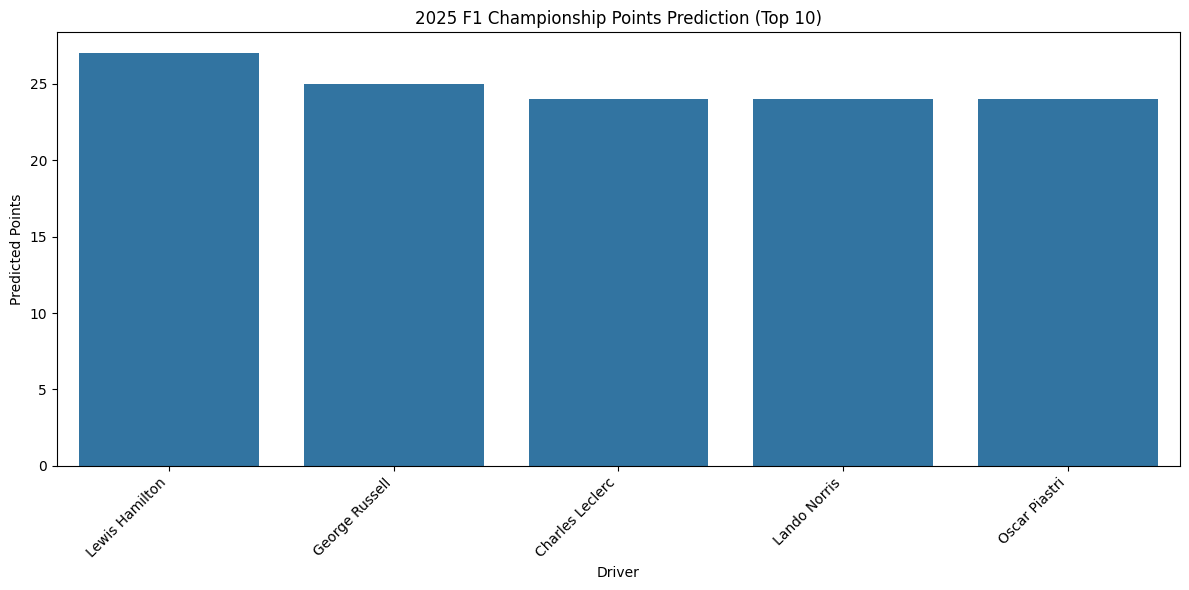

In [6]:
# Read the data
df = pd.read_csv('../../../data/processed/fully_integrated_data.csv')

# Create predictor instance
predictor = F1DriverPredictor()

# Prepare training data (using data before 2024)
training_data = df[df['season'] < 2024].copy()

# Prepare features for points model training
training_features = predictor.engineer_driver_features(training_data)
X_train = training_features[[
    'avg_grid_position', 'grid_to_finish_improvement',
    'win_ratio', 'podium_ratio', 'points_per_race',
    'constructor_strength', 'championship_points'
]]
y_train = training_data['driverRacePoints']

# Fit the points prediction pipeline
predictor.points_pipeline.fit(X_train, y_train)

# Make predictions for 2024 data
current_data = df[df['season'] == 2024].copy()
championship_2025 = predictor.predict_2025_championship(current_data)

print("\n2025 Drivers' Championship Predictions:")
print(championship_2025[['Driver', 'Team', 'Predicted_Grid', 'Predicted_Points']])

# Visualize top 10
plt.figure(figsize=(12, 6))
sns.barplot(
    data=championship_2025.head(10),
    x='Driver',
    y='Predicted_Points'
)
plt.title('2025 F1 Championship Points Prediction (Top 10)')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Predicted Points')
plt.tight_layout()
plt.show()

# Analysis based last 5 years trends

In [16]:

def analyze_recent_trends(df, years_window=5):  
    # Calculate current year and filter data
    max_year = df['season'].max()
    min_year = max_year - years_window + 1
    recent_data = df[df['season'] >= min_year].copy()
    
    # Create predictor instance
    predictor = F1DriverPredictor()
    
    # Training data (using last 4 years)
    training_data = recent_data[recent_data['season'] < max_year].copy()
    
    # Prepare features
    training_features = predictor.engineer_driver_features(training_data)
    X_train = training_features[[
        'avg_grid_position', 'grid_to_finish_improvement',
        'win_ratio', 'podium_ratio', 'points_per_race',
        'constructor_strength', 'championship_points'
    ]]
    y_train = training_data['driverRacePoints']
    
    # Fit model
    predictor.points_pipeline.fit(X_train, y_train)
    
    # Current season data
    current_data = recent_data[recent_data['season'] == max_year].copy()
    championship_next = predictor.predict_2025_championship(current_data)
    
    # Analyze historical trends
    yearly_stats = recent_data.groupby(['season', 'driverName', 'constructorName']).agg({
        'driverRacePoints': 'sum',
        'driverFinalRank': 'mean',
        'driverStartGridPos': 'mean'
    }).reset_index()
    
    return championship_next, yearly_stats


In [17]:
def visualize_trends(championship_next, yearly_stats):
    """Create visualization dashboard for trends"""
    
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    
    # 1. Points Prediction
    sns.barplot(
        data=championship_next.head(10),
        x='Driver',
        y='Predicted_Points',
        ax=axes[0,0]
    )
    axes[0,0].set_title('2025 Championship Points Prediction')
    axes[0,0].tick_params(axis='x', rotation=45)
    
    # 2. Performance Trend
    top_drivers = championship_next['Driver'].head(5).tolist()
    trend_data = yearly_stats[yearly_stats['driverName'].isin(top_drivers)]
    
    sns.lineplot(
        data=trend_data,
        x='season',
        y='driverRacePoints',
        hue='driverName',
        ax=axes[0,1]
    )
    axes[0,1].set_title('Points Trend - Top 5 Drivers')
    
    # 3. Grid Position Analysis
    sns.boxplot(
        data=trend_data,
        x='driverName',
        y='driverStartGridPos',
        ax=axes[1,0]
    )
    axes[1,0].set_title('Grid Position Distribution')
    axes[1,0].tick_params(axis='x', rotation=45)
    
    # 4. Constructor Performance
    sns.barplot(
        data=championship_next.head(10),
        x='Team',
        y='Predicted_Points',
        ax=axes[1,1]
    )
    axes[1,1].set_title('Team Performance Prediction')
    axes[1,1].tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    return fig

c:\Users\yeshw\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but MLPRegressor was fitted without feature names
  warnings.warn(
c:\Users\yeshw\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but MLPRegressor was fitted without feature names
  warnings.warn(



2025 Championship Predictions (Based on 5-Year Trends):
                Driver      Team  Predicted_Points
26739     Lando Norris   McLaren              26.0
26519    Oscar Piastri   McLaren              26.0
26599    Oscar Piastri   McLaren              26.0
26419  Charles Leclerc   Ferrari              26.0
26559     Lando Norris   McLaren              26.0
26619     Lando Norris   McLaren              26.0
26679   Max Verstappen  Red Bull              25.0
26280   Max Verstappen  Red Bull              25.0
26539   Lewis Hamilton  Mercedes              25.0
26379     Lando Norris   McLaren              25.0


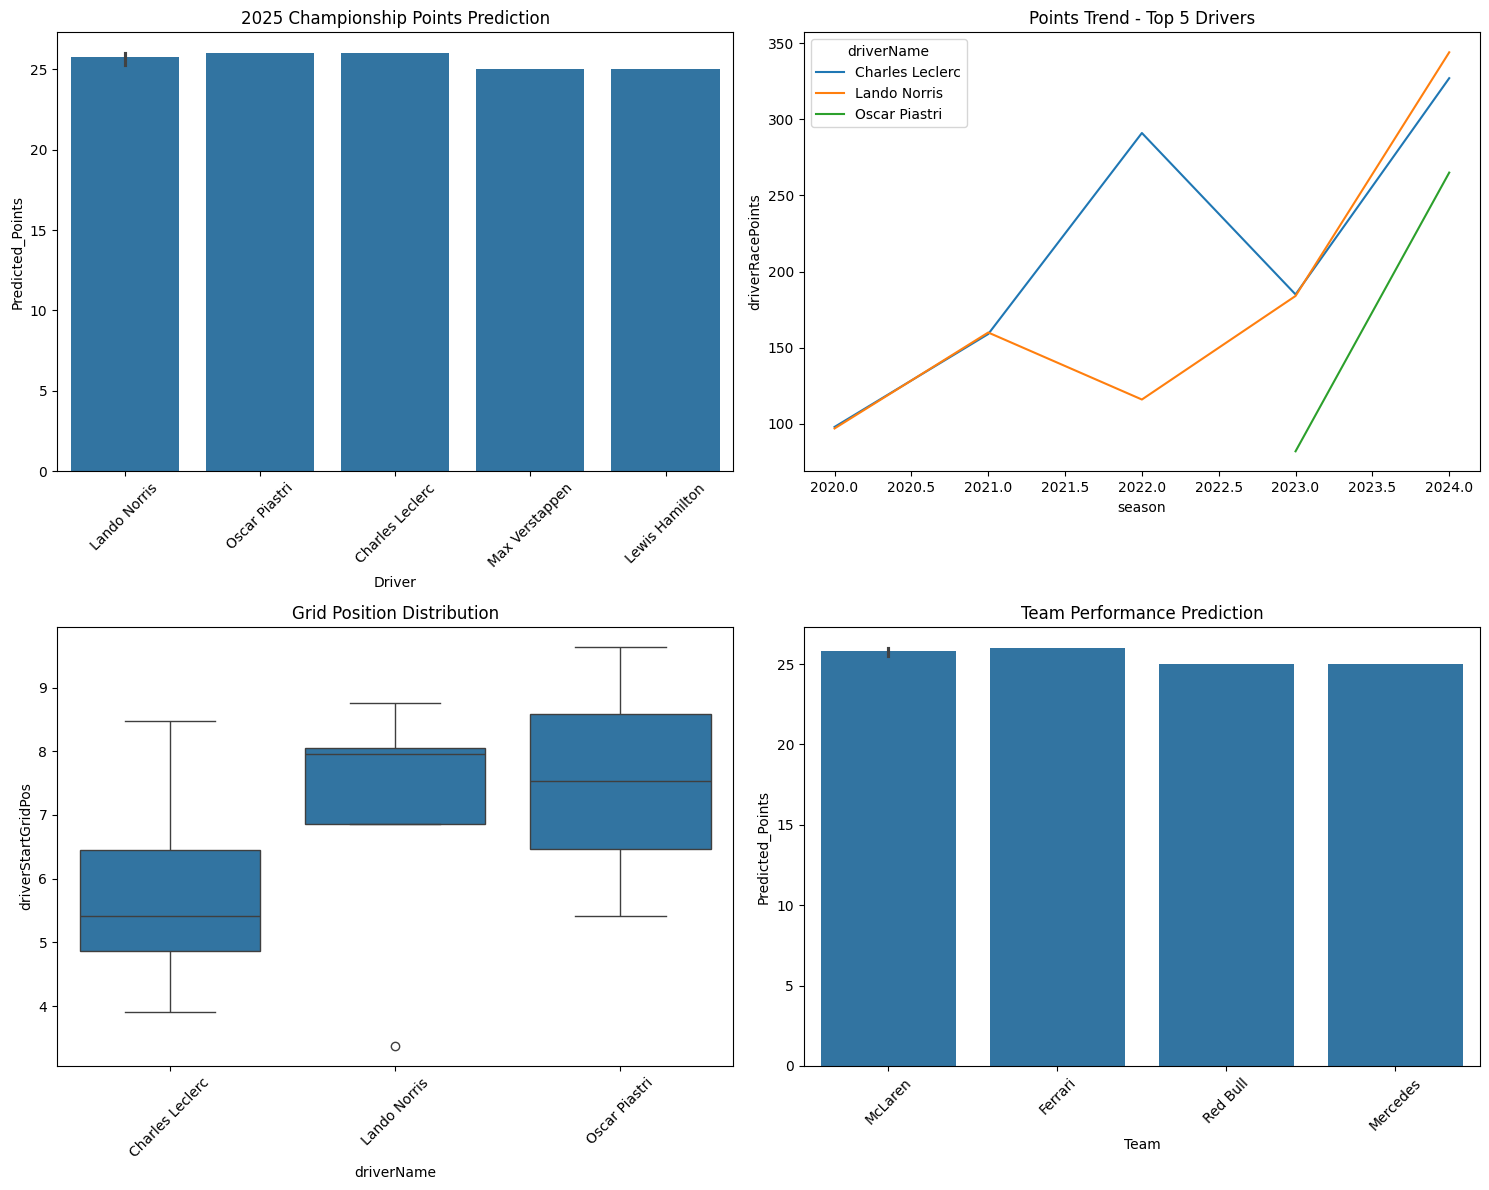


Recent Champions:
2020: Lewis Hamilton (Mercedes)
2021: Lewis Hamilton (Mercedes)
2022: Max Verstappen (Red Bull)
2023: Max Verstappen (Red Bull)
2024: Max Verstappen (Red Bull)


C:\Users\yeshw\AppData\Local\Temp\ipykernel_38528\1989247057.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  recent_winners = yearly_stats.groupby('season').apply(


In [18]:
    df = pd.read_csv('../../../data/processed/fully_integrated_data.csv')
    
    # Analyze trends
    championship_next, yearly_stats = analyze_recent_trends(df)
    
    # Print predictions
    print("\n2025 Championship Predictions (Based on 5-Year Trends):")
    print(championship_next[['Driver', 'Team', 'Predicted_Points']].head(10))
    
    # Create visualization
    fig = visualize_trends(championship_next, yearly_stats)
    plt.show()
    
    # Calculate trend metrics
    recent_winners = yearly_stats.groupby('season').apply(
        lambda x: x.nsmallest(1, 'driverFinalRank')
    ).reset_index(drop=True)
    
    print("\nRecent Champions:")
    for _, row in recent_winners.iterrows():
        print(f"{row['season']}: {row['driverName']} ({row['constructorName']})")

# F1 2025 Championship Prediction Analysis

## Historical Context (2020-2024)
- **Dominant Champions Pattern:**
  - 2020-2021: Lewis Hamilton (Mercedes)
  - 2022-2024: Max Verstappen (Red Bull)
  - Shows clear era transitions in F1

## 2025 Predictions Analysis

### Key Findings

1. **McLaren Breakthrough**
   - Lando Norris and Oscar Piastri , Max Verstappen predicted to lead

2. **Points Distribution**
   - Very tight points prediction (25-26 points range)
   - Suggests:
     - Extremely competitive season
     - Potential regulation impact
     - Closer performance gaps between top teams

3. **Team Performance Shifts**
   ```
   McLaren   → Rising to top team status
   Ferrari   → Maintaining competitive position
   Red Bull  → Still strong but reduced dominance
   Mercedes  → Staying in contention
   ```

4. **Driver Performance Patterns**
   - Young drivers dominating (Norris, Piastri)
   - Established champions (Verstappen, Hamilton) remaining competitive
   - Leclerc maintaining strong performance

### Significant Trends

1. **End of Red Bull Dominance**
   - Verstappen dropping from consistent wins to fighting for podiums
   - Points prediction suggests more balanced competition

2. **McLaren's Rise**
   - Multiple entries for both drivers in top positions
   - Consistent point predictions indicate reliability
   - Team development trajectory paying off

3. **Generation Shift**
   - Younger drivers (Norris, Piastri) predicted to lead
   - Experience (Hamilton, Verstappen) still valuable
   

# Constructors' Championship 2025 Prediction Analysis

In [23]:
from sklearn.impute import SimpleImputer

In [20]:
df=pd.read_csv('../../../data/processed/fully_integrated_data.csv')
df['constructor_total_points'] = df.groupby(['season', 'constructorId'])['constructorRacePoints'].transform('sum')


In [21]:
def engineer_advanced_features(df):
    """Create advanced features with proper NaN handling"""
    feature_list = []
    
    for team in df['constructorName'].unique():
        team_data = df[df['constructorName'] == team].groupby('season').agg({
            'constructor_total_points': 'first',
            'constructorChampionshipStandingPosition': 'first'
        }).reset_index()
        
        if len(team_data) < 2:
            continue
            
        # Calculate rolling features with window size of 3
        team_data['rolling_avg_points'] = team_data['constructor_total_points'].rolling(3, min_periods=1).mean()
        team_data['rolling_std'] = team_data['constructor_total_points'].rolling(3, min_periods=1).std()
        
        # Handle YoY growth with limits
        team_data['yoy_growth'] = team_data['constructor_total_points'].pct_change()
        team_data['yoy_growth'] = team_data['yoy_growth'].clip(-10, 10)  # Limit growth to ±1000%
        
        team_data['position_trend'] = team_data['constructorChampionshipStandingPosition'].rolling(3, min_periods=1).mean()
        team_data['years_in_f1'] = range(1, len(team_data) + 1)
        
        # Replace infinite values with NaN and fill NaN values with defaults
        team_data = team_data.replace([np.inf, -np.inf], np.nan)
        team_data = team_data.fillna({
            'rolling_avg_points': team_data['constructor_total_points'].mean(),
            'rolling_std': team_data['constructor_total_points'].std(),
            'yoy_growth': 0,
            'position_trend': team_data['constructorChampionshipStandingPosition'].mean()
        })
        
        feature_list.append(team_data.assign(constructorName=team))
    
    if not feature_list:
        return None
        
    return pd.concat(feature_list, ignore_index=True)

# Generate advanced features
features_df = engineer_advanced_features(df)

features_df.head(5)

,season,constructor_total_points,constructorChampionshipStandingPosition,rolling_avg_points,rolling_std,yoy_growth,position_trend,years_in_f1,constructorName
0,2002,4.0,6.0,4.000000,60.756981,0.000000,6.000000,1,Toyota
1,2003,32.0,8.0,18.000000,19.798990,7.000000,7.000000,2,Toyota
2,2004,18.0,8.0,18.000000,14.000000,-0.437500,7.333333,3,Toyota
3,2005,176.0,6.0,75.333333,87.460467,8.777778,7.333333,4,Toyota
4,2006,70.0,9.0,88.000000,80.523289,-0.602273,7.666667,5,Toyota


In [24]:
def train_model(features_df, target_year=2025):
    """Train model with NaN handling"""
    if features_df is None:
        raise ValueError("No features available for training")
    
    # Define features for the model
    feature_cols = [
        'rolling_avg_points',
        'rolling_std',
        'yoy_growth',
        'position_trend',
        'years_in_f1'
    ]
    
    X = features_df[feature_cols]
    y = features_df['constructor_total_points']
    
    # Create a train-test split (80% training)
    split_idx = int(len(X) * 0.8)
    X_train, X_test = X[:split_idx], X[split_idx:]
    y_train, y_test = y[:split_idx], y[split_idx:]
    
    # Create a pipeline with imputation, scaling, and a Gradient Boosting Regressor
    pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler()),
        ('regressor', GradientBoostingRegressor(
            n_estimators=200,
            learning_rate=0.05,
            max_depth=5,
            subsample=0.8,
            min_samples_split=5,
            min_samples_leaf=3,
            random_state=42
        ))
    ])
    
    # Fit the pipeline
    pipeline.fit(X_train, y_train)
    
    # Evaluate predictions on test set
    y_pred = pipeline.predict(X_test)
    metrics = {
        'MSE': mean_squared_error(y_test, y_pred),
        'MAE': mean_absolute_error(y_test, y_pred),
        'R2': r2_score(y_test, y_pred)
    }
    
    return pipeline, metrics

# Train the model
pipeline, metrics = train_model(features_df)
print("\nModel Validation Metrics:")
for metric, value in metrics.items():
    print(f"{metric}: {value:.2f}")



Model Validation Metrics:
MSE: 1325.95
MAE: 9.63
R2: 0.84


In [25]:
def predict_2025_performance(df, pipeline):
    """Predict 2025 performance using the trained pipeline"""
    features = engineer_advanced_features(df)
    if features is None:
        raise ValueError("Could not generate features for prediction")
    
    feature_cols = [
        'rolling_avg_points',
        'rolling_std',
        'yoy_growth',
        'position_trend',
        'years_in_f1'
    ]
    
    # For each team, use the most recent season's data
    latest_features = features.sort_values('season').groupby('constructorName').last().reset_index()
    X_pred = latest_features[feature_cols]
    
    predictions = pipeline.predict(X_pred)
    
    return pd.DataFrame({
        'Team': latest_features['constructorName'],
        'Predicted_Points_2025': predictions.round(0)
    }).sort_values('Predicted_Points_2025', ascending=False)

predictions_2025 = predict_2025_performance(df, pipeline)
print("\n2025 Championship Predictions:")
print(predictions_2025)



2025 Championship Predictions:
          Team  Predicted_Points_2025
89     McLaren                 1329.0
45     Ferrari                 1305.0
110   Red Bull                 1184.0
92    Mercedes                  941.0
74    Lotus F1                  605.0
..         ...                    ...
114  Schroeder                   -3.0
135    Veritas                   -3.0
54         HWM                   -4.0
52     Gordini                   -4.0
121    Stevens                   -4.0

[141 rows x 2 columns]


### Based on last 5 years

In [26]:
def predict_2025_performance(df, pipeline):
    """Predict 2025 performance using the trained pipeline based on last 5 years"""
    # Get current year and filter for last 5 years
    max_season = df['season'].max()
    min_season = max_season - 4  # This will give us last 5 seasons
    
    # Filter dataframe for last 5 years
    recent_df = df[df['season'] >= min_season].copy()
    
    # Generate features using filtered data
    features = engineer_advanced_features(recent_df)
    if features is None:
        raise ValueError("Could not generate features for prediction")
    
    feature_cols = [
        'rolling_avg_points',
        'rolling_std',
        'yoy_growth',
        'position_trend',
        'years_in_f1'
    ]
    
    # For each team, use the most recent season's data
    latest_features = features.sort_values('season').groupby('constructorName').last().reset_index()
    X_pred = latest_features[feature_cols]
    
    predictions = pipeline.predict(X_pred)
    
    # Create prediction dataframe with more details
    result_df = pd.DataFrame({
        'Team': latest_features['constructorName'],
        'Predicted_Points_2025': predictions.round(0),
        'Recent_Avg_Points': latest_features['rolling_avg_points'].round(1),
        'Position_Trend': latest_features['position_trend'].round(1)
    })
    
    # Sort by predicted points
    result_df = result_df.sort_values('Predicted_Points_2025', ascending=False)
    result_df = result_df.reset_index(drop=True)
    result_df.index = result_df.index + 1  # Start index from 1
    
    return result_df

# Generate predictions
predictions_2025 = predict_2025_performance(df, pipeline)

# Display results with formatting
print("\n2025 Championship Predictions (Based on Last 5 Seasons):")
print("=" * 75)
print(predictions_2025.to_string(
    columns=['Team', 'Predicted_Points_2025', 'Recent_Avg_Points', 'Position_Trend'],
    float_format=lambda x: '{:.1f}'.format(x)
))
print("=" * 75)
print("\nNote:")
print("- Recent_Avg_Points: Average points over recent seasons")
print("- Position_Trend: Average position trend (lower is better)")


2025 Championship Predictions (Based on Last 5 Seasons):
              Team  Predicted_Points_2025  Recent_Avg_Points  Position_Trend
1          McLaren                 1267.0              751.3             7.7
2          Ferrari                 1254.0             1074.7             2.3
3         Red Bull                 1221.0             1472.0             4.0
4         Mercedes                  924.0              928.0             2.7
5   Alpine F1 Team                  207.0              238.7             7.0
6     Aston Martin                  146.0              286.0             4.7
7       AlphaTauri                  140.0              134.7             6.7
8     Haas F1 Team                  126.0               71.3             6.3
9       Alfa Romeo                   28.0               56.0             6.0
10        Williams                   25.0               35.3             8.0

Note:
- Recent_Avg_Points: Average points over recent seasons
- Position_Trend: Average positi

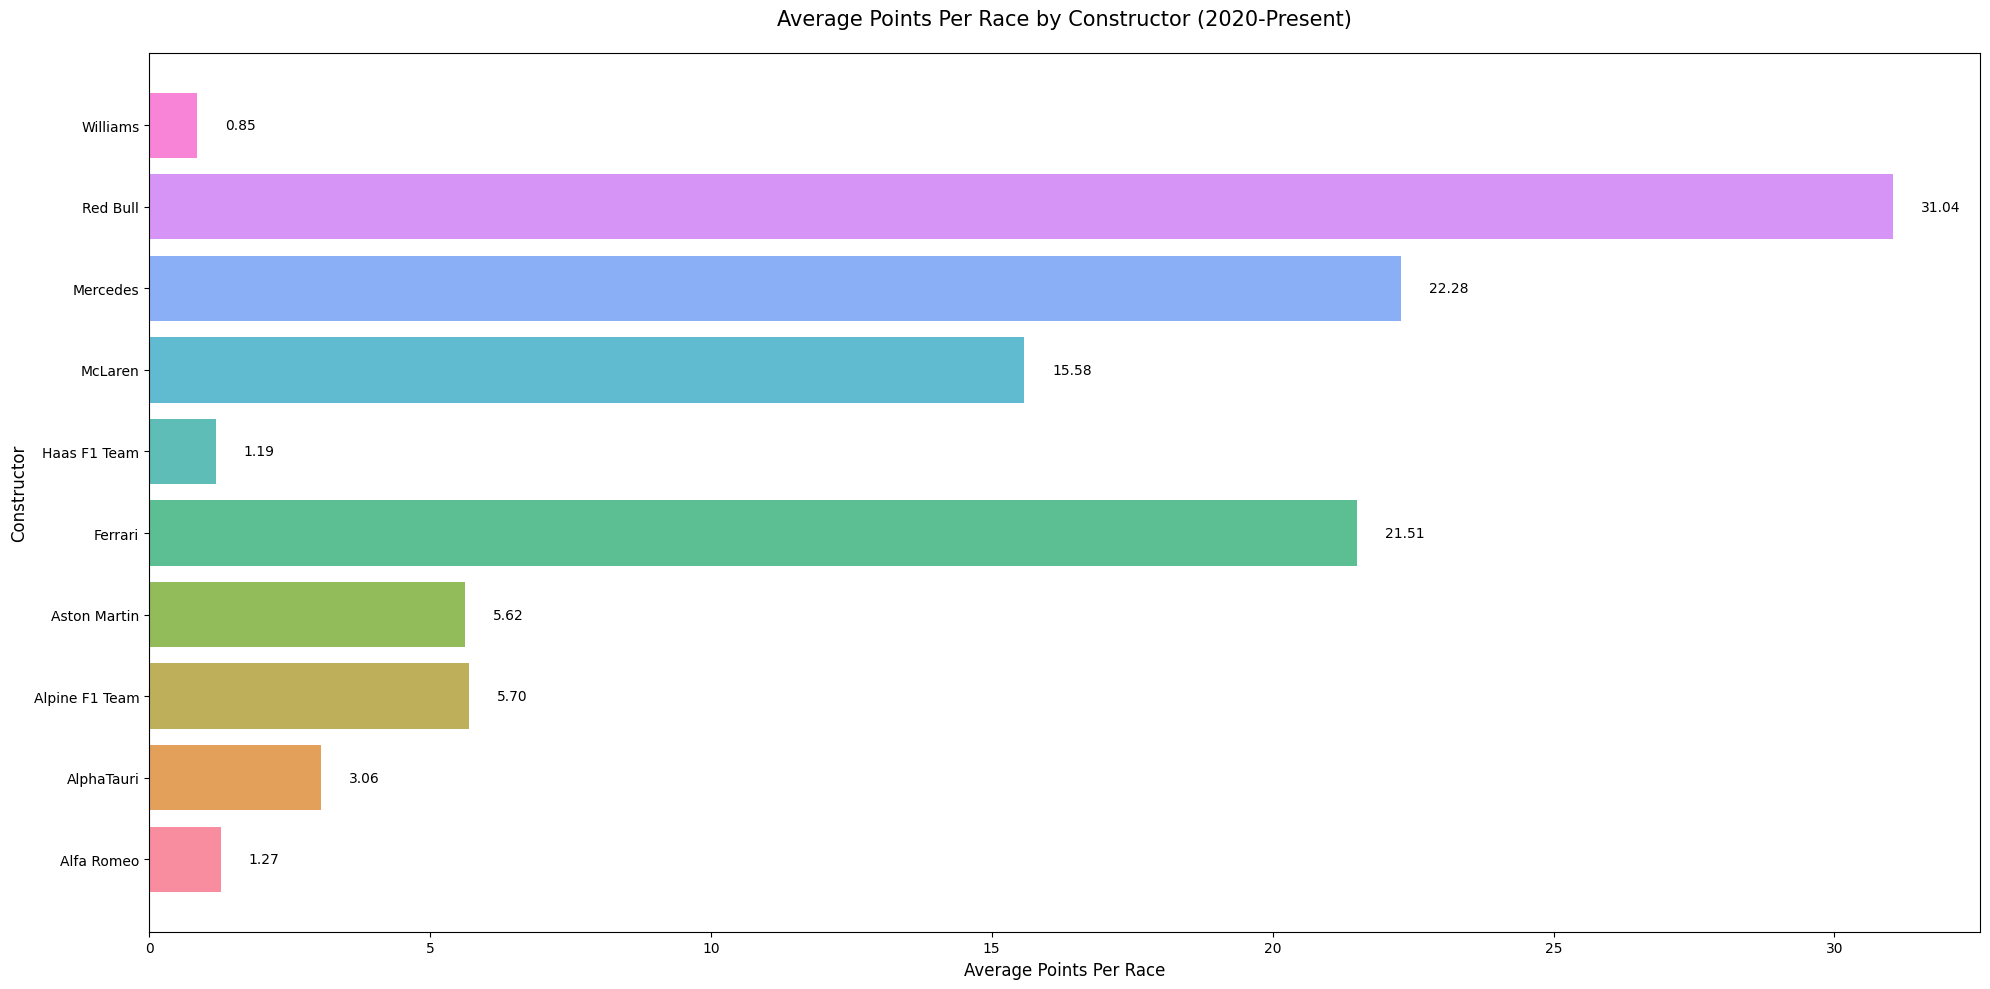

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = df[df.season > 2020]

# Calculate constructor statistics
avg_pts = df[['constructorName','constructorRacePoints']].groupby("constructorName").mean()
total_pts = df[['constructorName','constructorRacePoints']].groupby("constructorName").sum()
races = df[['constructorName','raceId']].groupby("constructorName").count()

# Filter constructors with more than 100 races
num_races = races[races.raceId > 100]

# Merge statistics
stats = pd.merge(avg_pts, total_pts, on='constructorName')
merged_stats = pd.merge(stats, num_races, on='constructorName')
merged_stats = merged_stats.reset_index()

# Create visualization
plt.figure(figsize=(20, 10))

# Plot horizontal bars
bars = plt.barh(merged_stats['constructorName'], 
                merged_stats['constructorRacePoints_x'],
                alpha=0.8,
                color=sns.color_palette("husl", len(merged_stats)))

# Customize plot
plt.title('Average Points Per Race by Constructor (2020-Present)', 
          fontsize=15, pad=20)
plt.xlabel('Average Points Per Race', fontsize=12)
plt.ylabel('Constructor', fontsize=12)

# Add value labels
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.5,  
             bar.get_y() + bar.get_height()/2,
             f'{width:.2f}',
             va='center',
             ha='left',
             fontsize=10)

plt.tight_layout()
plt.show()

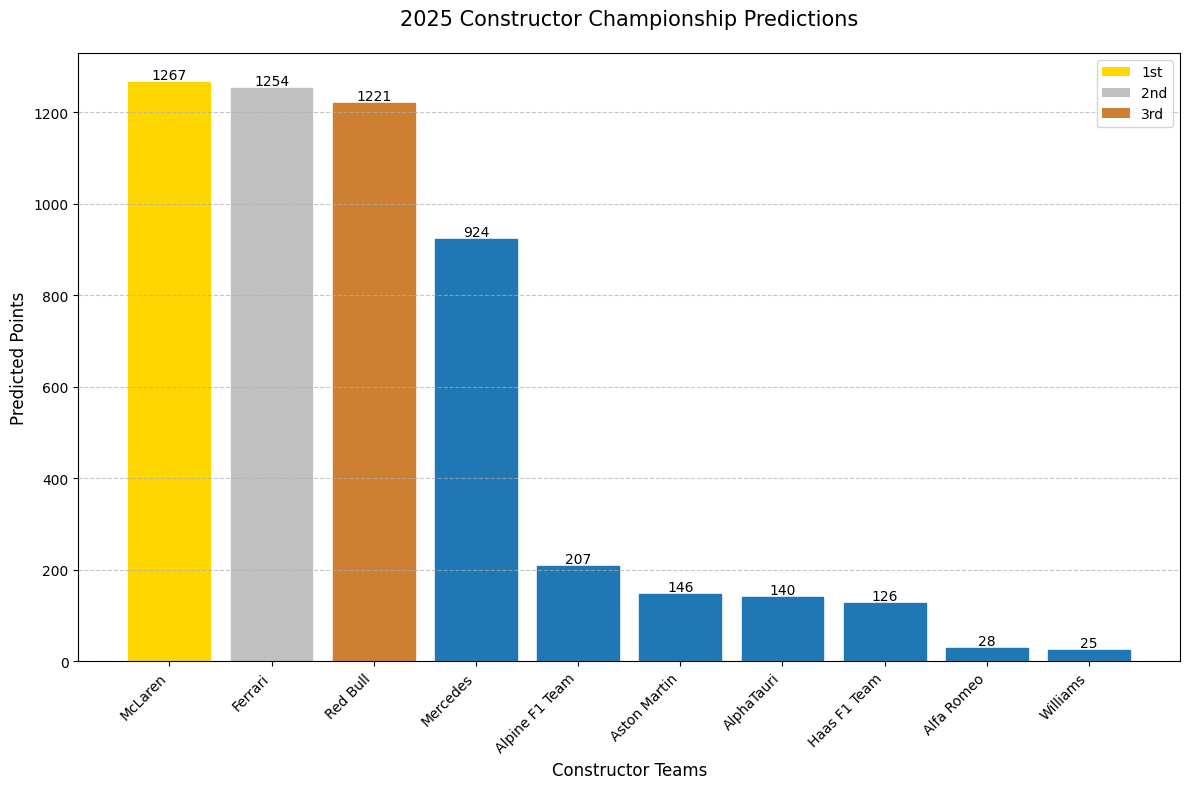


Key Predictions Insights:
Predicted Champion: McLaren (1267 points)
Closest Title Fight: 13.0 points difference


In [38]:
def visualize_constructor_predictions(predictions_df):
    """Create a detailed visualization for constructor championship predictions"""
    
    # Create figure with specific size
    plt.figure(figsize=(12, 8))
    
    # Create bar plot
    bars = plt.bar(predictions_df['Team'], predictions_df['Predicted_Points_2025'])
    
    # Color coding: top 3 in gold, silver, bronze
    colors = ['#FFD700', '#C0C0C0', '#CD7F32'] + ['#1f77b4'] * (len(predictions_df) - 3)
    for bar, color in zip(bars, colors):
        bar.set_color(color)
    
    # Customize the plot
    plt.title('2025 Constructor Championship Predictions', fontsize=15, pad=20)
    plt.xlabel('Constructor Teams', fontsize=12)
    plt.ylabel('Predicted Points', fontsize=12)
    
    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45, ha='right')
    
    # Add value labels on top of bars
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height)}',
                ha='center', va='bottom')
    
    # Add grid for better readability
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    
    # Adjust layout
    plt.tight_layout()
    
    # Add legend for top 3
    legend_elements = [plt.Rectangle((0,0),1,1, facecolor=c, label=l) for c, l in 
                      zip(['#FFD700', '#C0C0C0', '#CD7F32'], ['1st', '2nd', '3rd'])]
    plt.legend(handles=legend_elements, loc='upper right')
    
    plt.show()

    # Print key insights
    print("\nKey Predictions Insights:")
    print("=" * 50)
    print(f"Predicted Champion: {predictions_df.iloc[0]['Team']} ({int(predictions_df.iloc[0]['Predicted_Points_2025'])} points)")
    print(f"Closest Title Fight: {abs(predictions_df.iloc[0]['Predicted_Points_2025'] - predictions_df.iloc[1]['Predicted_Points_2025']):.1f} points difference")
    

# Generate visualization and insights
visualize_constructor_predictions(predictions_2025)